In [26]:
import numpy as np
import timeit
from models import KNN, DecisionTree, preprocessing, RandomForest
from models.utils import strategies
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import PlotType, plot, heatmaps, train_test_split, evaluate, evaluate_by_class\
    , grid_search_cv, plot_cluster_by_model
from typing import get_args
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# load data

In [27]:
# Load data
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [28]:
data.describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


# Data preprocessing

In [29]:
target_column = 'Fertility'
normalization_type = 'minmax'

In [30]:
X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)

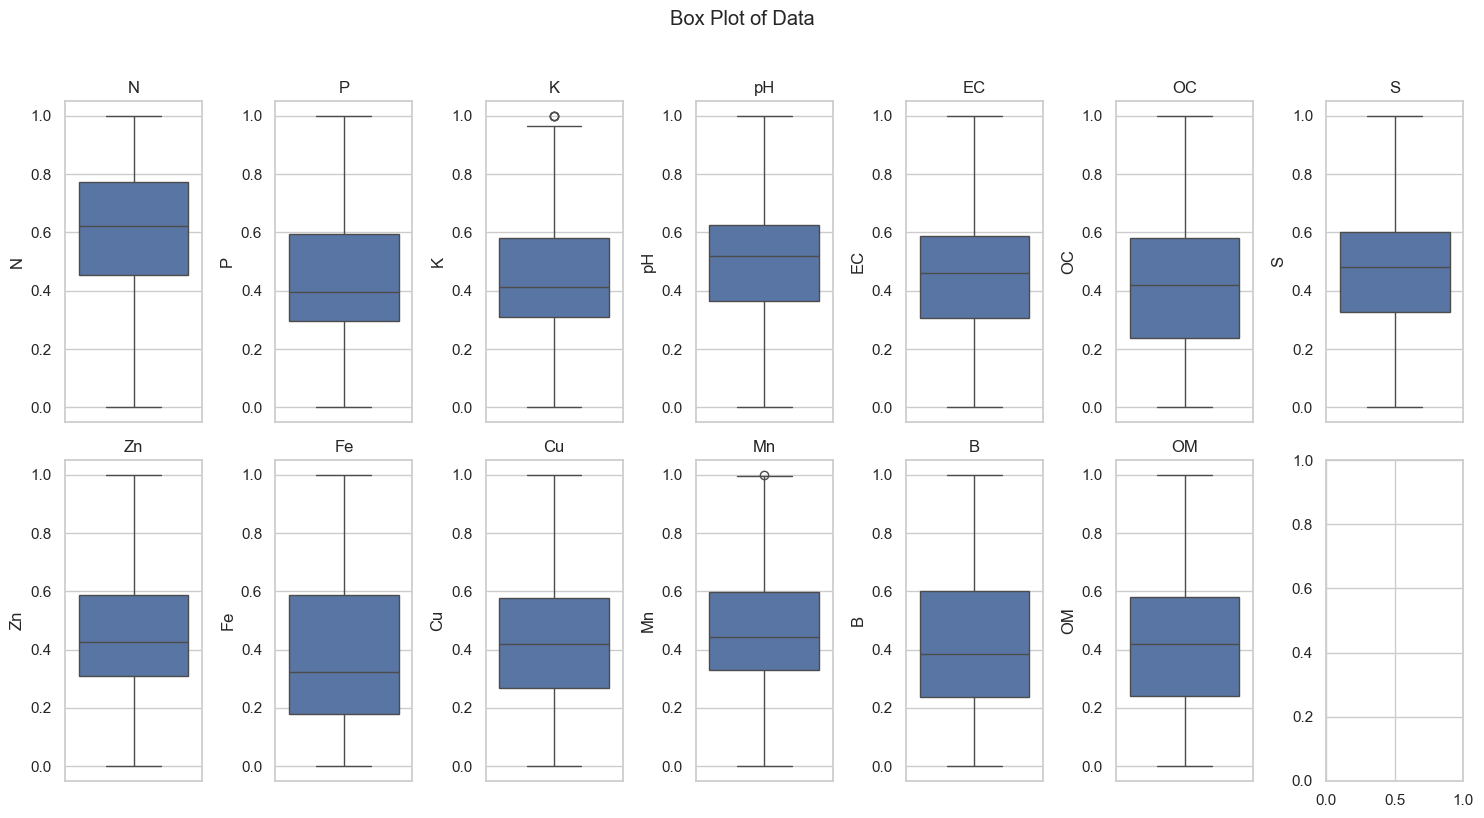

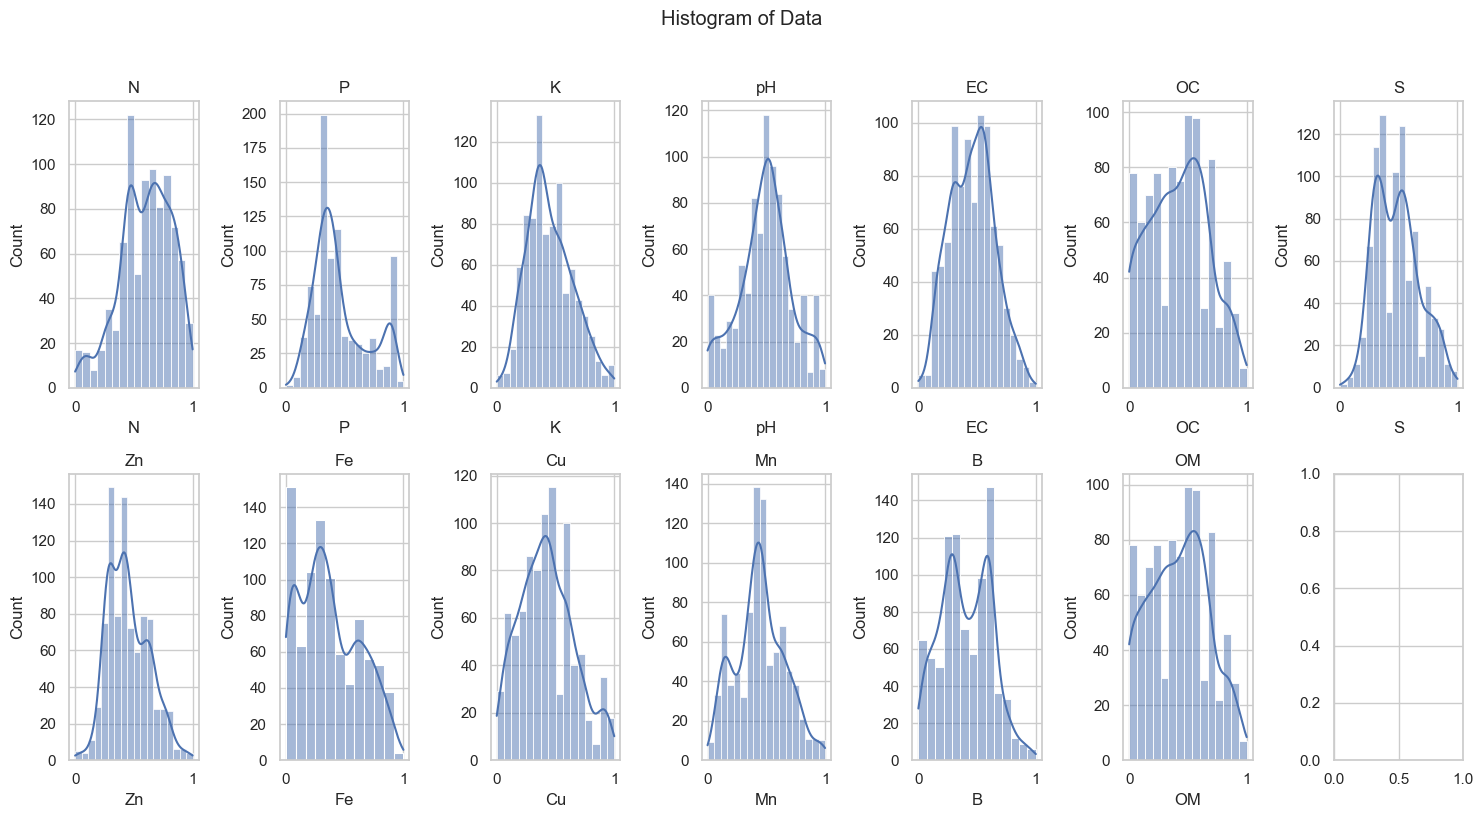

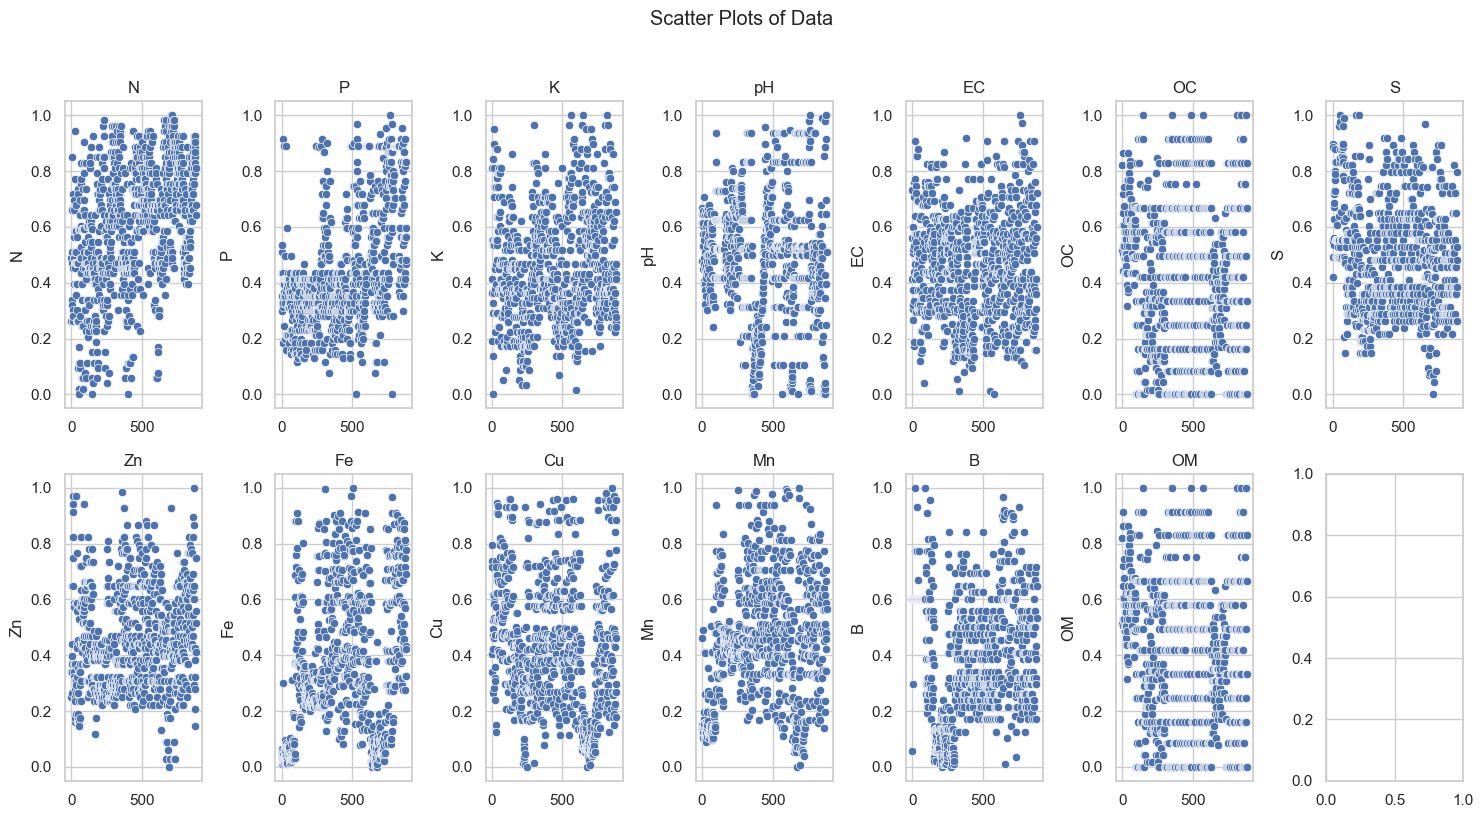

In [31]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [32]:
# save processed data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(706, 13) (176, 13) (706,) (176,)


# KNN

In [35]:
for strategy in strategies:
    knn = KNN(k=10, strategy=strategy)
    knn.fit(X_train, Y_train)
    print(f'Accuracy for {strategy} strategy: {knn.score(X_test, Y_test, metric="accuracy")}')

Accuracy for euclidean strategy: 0.7954545454545454
Accuracy for manhattan strategy: 0.7784090909090909
Accuracy for minkowski strategy: 0.7954545454545454
Accuracy for cosine strategy: 0.7613636363636364
Accuracy for hamming strategy: 0.6761363636363636


# Decision tree

In [36]:
tree = DecisionTree()
tree.fit(X_train, Y_train)
print(f'Accuracy for decision tree: {tree.score(X_test, Y_test, metric="accuracy")}')

Accuracy for decision tree: 0.8806818181818182


# Random forest

In [37]:
random_forest = RandomForest(n_trees=10)
random_forest.fit(X, Y)
print(f'Accuracy for random forest: {random_forest.score(X_test, Y_test, metric="accuracy")}')

Accuracy for random forest: 0.9715909090909091


# Search for best parameters using grid search cv

In [38]:
averages = list(get_args(Average))
averages.remove('binary') # out dataset has more than 2 classes, so we can't use binary
averages

['macro', 'micro', 'weighted']

<h4>Knn</h4>

In [39]:
parameters = {'k': [1, 3, 5, 7], 'strategy': strategies.keys()}
results, best_results = grid_search_cv(KNN, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'k': 3, 'strategy': 'euclidean'},
 'best_score': 0.6450791252431012}


,model,accuracy,precision,recall,f1-score,specificity
0,"KNN(strategy=euclidean_distance, k=1)",0.741844,0.612994,0.628436,0.616746,0.842652
1,"KNN(strategy=manhattan_distance, k=1)",0.692199,0.544654,0.546786,0.543613,0.813399
2,"KNN(strategy=minkowski_distance, k=1)",0.734752,0.597411,0.587284,0.585423,0.838616
3,"KNN(strategy=cosine_distance, k=1)",0.703546,0.553298,0.557730,0.553054,0.822209
4,"KNN(strategy=hamming_distance, k=1)",0.597163,0.490112,0.508195,0.493579,0.754379
5,"KNN(strategy=euclidean_distance, k=3)",0.782979,0.686432,0.649572,0.645079,0.864079
6,"KNN(strategy=manhattan_distance, k=3)",0.775887,0.637928,0.581648,0.592615,0.859686
7,"KNN(strategy=minkowski_distance, k=3)",0.791489,0.717598,0.599621,0.614773,0.868930
8,"KNN(strategy=cosine_distance, k=3)",0.747518,0.642221,0.600994,0.598162,0.843727
9,"KNN(strategy=hamming_distance, k=3)",0.602837,0.571728,0.445629,0.453605,0.748746


<h4>Decision tree</h4>

In [40]:
parameters = {'max_depth': [10, 50, 100, 150, 200]}
results, best_results = grid_search_cv(DecisionTree, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 50}, 'best_score': 0.7440997683319874}


,model,accuracy,precision,recall,f1-score,specificity
0,DecisionTree(max_depth=10),0.853901,0.733572,0.763594,0.736778,0.914832
1,DecisionTree(max_depth=50),0.866667,0.755755,0.751547,0.744100,0.921661
2,DecisionTree(max_depth=100),0.862411,0.740235,0.750131,0.739460,0.918828
3,DecisionTree(max_depth=150),0.873759,0.743283,0.743516,0.736984,0.925034
4,DecisionTree(max_depth=200),0.848227,0.679074,0.678915,0.674821,0.911661


<h4>Random forest</h4>

In [41]:
parameters = {'n_trees': [2, 5, 10, 15], 'max_depth': [10, 50, 100, 150, 200]}
results, best_results = grid_search_cv(RandomForest, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 10, 'n_trees': 10},
 'best_score': 0.923908711385628}


,model,accuracy,precision,recall,f1-score,specificity
0,"RandomForest(n_trees=2, max_depth=10)",0.939007,0.898461,0.855296,0.868562,0.962873
1,"RandomForest(n_trees=2, max_depth=50)",0.936170,0.894068,0.805600,0.828065,0.961554
2,"RandomForest(n_trees=2, max_depth=100)",0.943262,0.873512,0.822591,0.839217,0.964231
3,"RandomForest(n_trees=2, max_depth=150)",0.948936,0.953003,0.853069,0.872587,0.967633
4,"RandomForest(n_trees=2, max_depth=200)",0.947518,0.932274,0.876755,0.897531,0.967119
5,"RandomForest(n_trees=5, max_depth=10)",0.954610,0.965335,0.850776,0.876002,0.970644
6,"RandomForest(n_trees=5, max_depth=50)",0.943262,0.840437,0.813805,0.822048,0.964745
7,"RandomForest(n_trees=5, max_depth=100)",0.943262,0.922455,0.874509,0.886753,0.964911
8,"RandomForest(n_trees=5, max_depth=150)",0.944681,0.919768,0.856602,0.869710,0.965228
9,"RandomForest(n_trees=5, max_depth=200)",0.939007,0.883051,0.848933,0.855840,0.963703


# Evaluate the final models

In [42]:
models = [KNN(k=5, strategy='euclidean'), DecisionTree(max_depth=200), RandomForest(n_trees=15, max_depth=150)]
for model in models:
    model.fit(X_train, Y_train)

models

[KNN(strategy=euclidean_distance, k=5),
 DecisionTree(max_depth=200),
 RandomForest(n_trees=15, max_depth=150)]

In [43]:
results_by_class = evaluate_by_class(X_test, Y_test, models)
pprint(results_by_class)

{'DecisionTree(max_depth=200)': {0: {'accuracy': 0.9318181818181818,
                                     'f1-score': 0.922077922077922,
                                     'precision': 0.8987341772151899,
                                     'recall': 0.9466666666666667,
                                     'specificity': 0.9207920792079208},
                                 1: {'accuracy': 0.8920454545454546,
                                     'f1-score': 0.8961748633879781,
                                     'precision': 0.9010989010989011,
                                     'recall': 0.8913043478260869,
                                     'specificity': 0.8928571428571429},
                                 2: {'accuracy': 0.9375,
                                     'f1-score': 0.26666666666666666,
                                     'precision': 0.3333333333333333,
                                     'recall': 0.2222222222222222,
                                     'spe

In [44]:
results = evaluate(X_test, Y_test, models, averages=averages, metrics=get_args(Metric))
results

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,"KNN(strategy=euclidean_distance, k=5)",0.789773,0.529712,0.789773,0.753656,0.555362,0.789773,0.789773,0.542231,0.789773,0.771288,0.865834,0.894886,0.807728
1,DecisionTree(max_depth=200),0.880682,0.711055,0.880682,0.871058,0.686731,0.880682,0.880682,0.694973,0.880682,0.875022,0.929899,0.940341,0.909015
2,"RandomForest(n_trees=15, max_depth=150)",0.914773,0.942015,0.914773,0.917738,0.741884,0.914773,0.914773,0.786195,0.914773,0.907455,0.945152,0.957386,0.920682


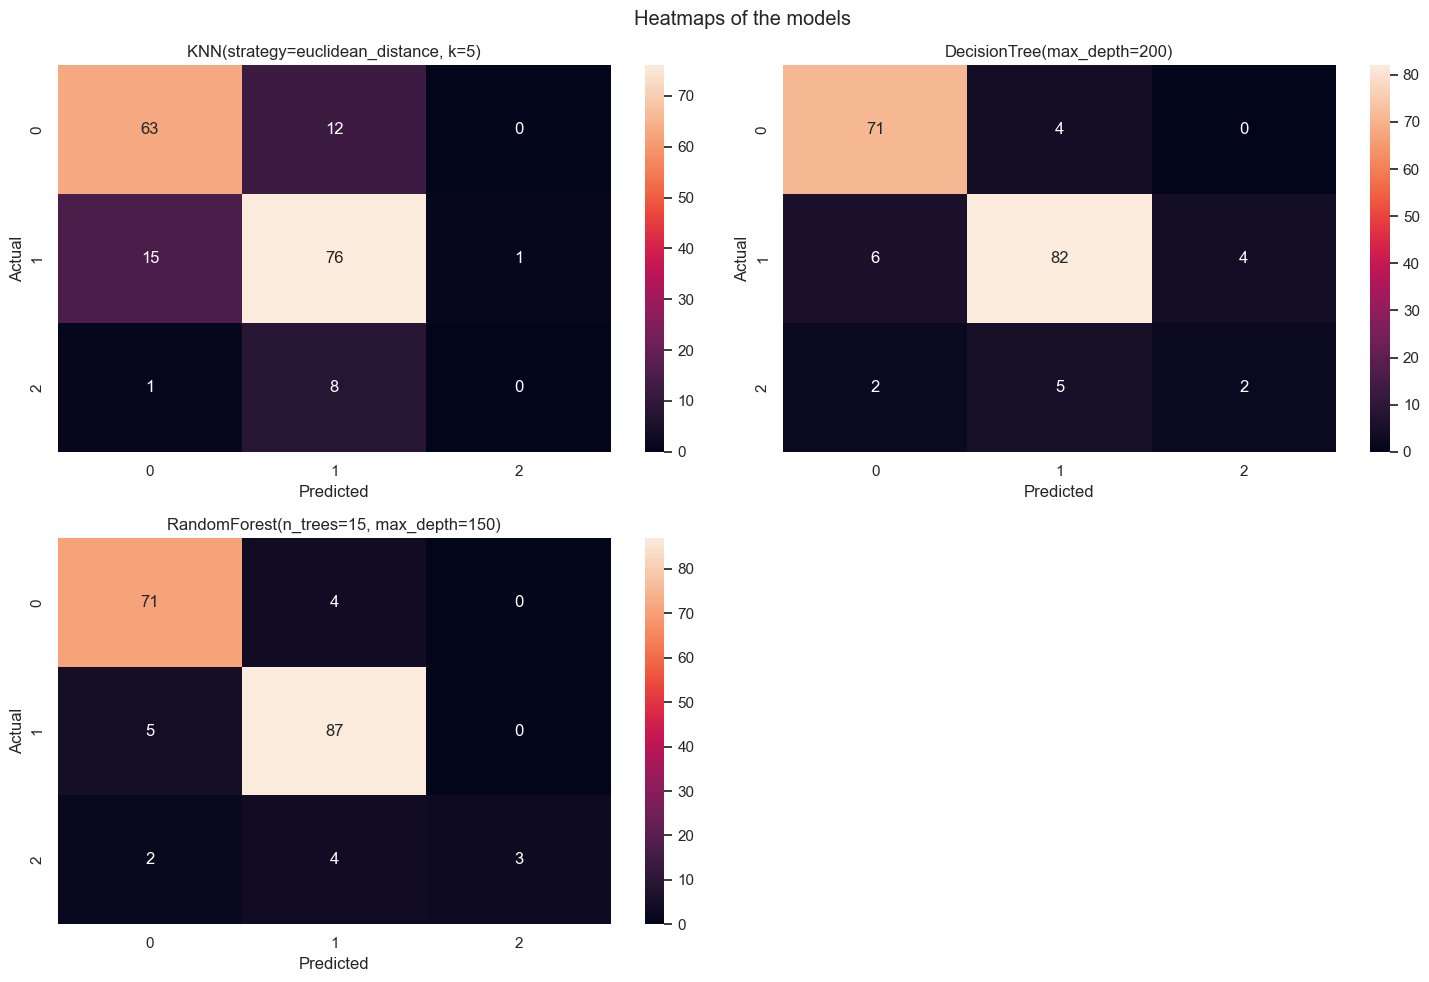

In [45]:
heatmaps(x_test=X_test, y_test=Y_test, models=models)

# execution time

In [46]:
execution_times = []
number_of_executions = 1000
for model in models:
    execution_time = timeit.timeit(lambda: model.predict(X_test), number=number_of_executions)
    execution_times.append({'model': str(model), 'time': execution_time / number_of_executions} )
execution_times = pd.DataFrame(execution_times)

execution_times

,model,time
0,"KNN(strategy=euclidean_distance, k=5)",0.379646
1,DecisionTree(max_depth=200),0.000372
2,"RandomForest(n_trees=15, max_depth=150)",0.005690


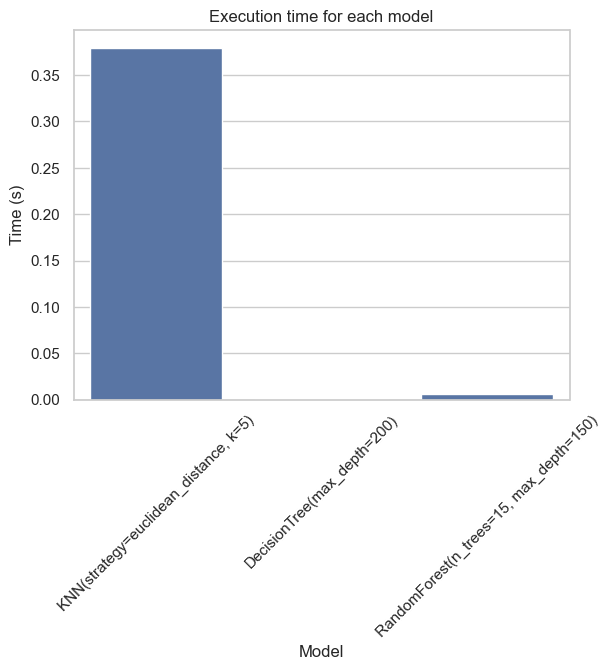

In [47]:
# plot execution time
sns.barplot(x='model', y='time', data=execution_times)

plt.title('Execution time for each model')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.show()

# test with examples

In [48]:
num_examples = 5
for i in range(num_examples):
    # get random example
    random_index = np.random.randint(0, X_test.shape[0])
    x = X_test.iloc[random_index]
    y = Y_test.iloc[random_index]
    print(f'Example {i+1}:')
    print(f'Actual class: {y}')
    for model in models:
        print(f'Prediction for {model.__class__.__name__}: {model.predict_single(x)}')

Example 1:
Actual class: 0
Prediction for KNN: 0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 2:
Actual class: 0
Prediction for KNN: 0
Prediction for DecisionTree: 1
Prediction for RandomForest: 0
Example 3:
Actual class: 1
Prediction for KNN: 1
Prediction for DecisionTree: 1
Prediction for RandomForest: 1
Example 4:
Actual class: 0
Prediction for KNN: 0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 5:
Actual class: 0
Prediction for KNN: 0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0


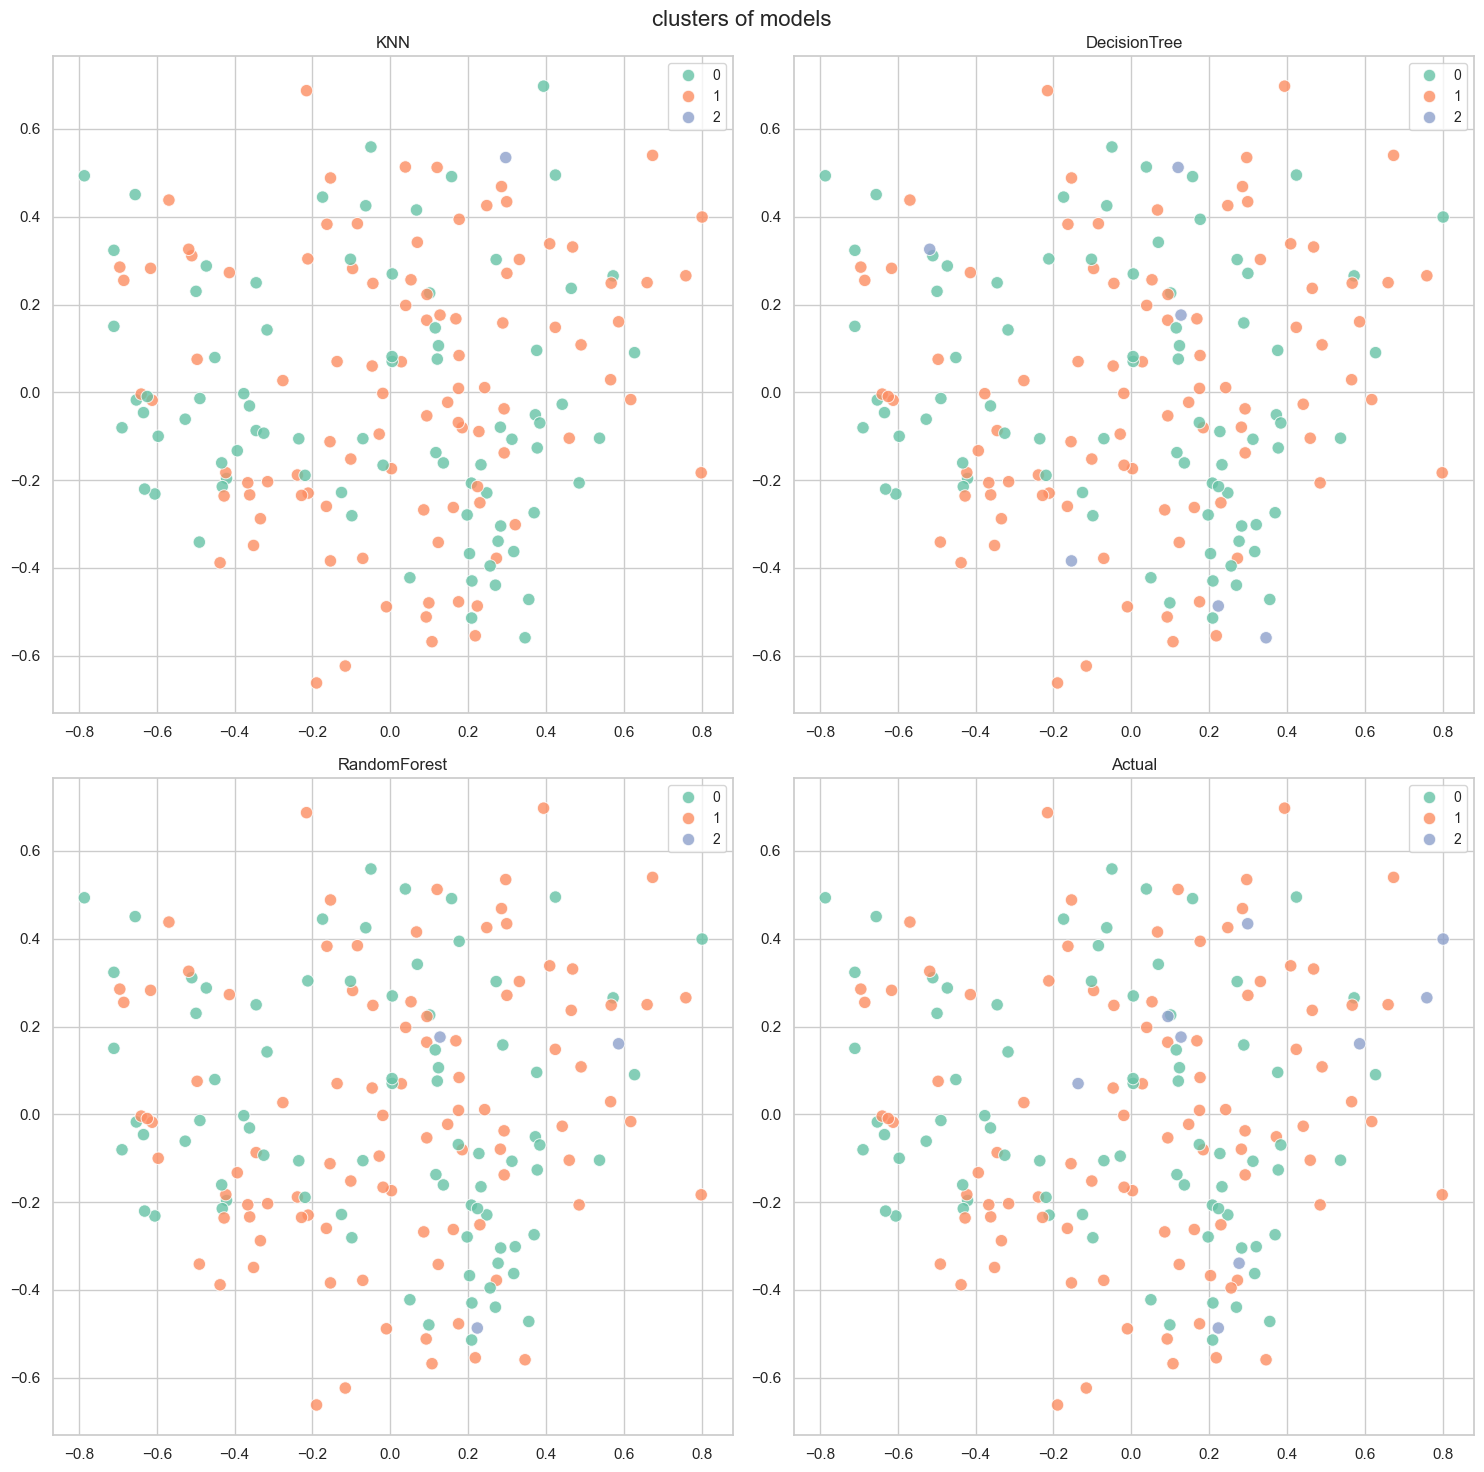

In [49]:
plot_cluster_by_model(X_test, Y_test, "clusters of models", models)